*As a data analyst, the process of working with a newly received dataset like Sales.csv typically involves several steps. Here’s a general outline of what we can do:*

Data Loading: Load the data to understand its structure and format.

Data Cleaning: Check for and handle missing values, duplicates, or incorrect entries.

Exploratory Data Analysis (EDA): Examine the data to find patterns, trends, and anomalies.

Visualization: Create charts and graphs to visualize findings and trends in the data.

Statistical Analysis: Apply statistical methods to test hypotheses or find significant differences and correlations.

Reporting: Summarize the findings and potentially prepare a report or presentation.

In [1]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\moroi\OneDrive\Desktop\Sales.csv" 
sales_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
sales_data.head()


,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [2]:
# Check for missing values in the dataset
missing_values = sales_data.isnull().sum()

# Check for duplicate rows in the dataset
duplicate_rows = sales_data.duplicated().sum()

missing_values, duplicate_rows


(Day                 0
 Month               0
 Year                0
 Customer_Age        0
 Age_Group           0
 Customer_Gender     0
 Country             0
 State               0
 Product_Category    0
 Sub_Category        0
 Product             0
 Order_Quantity      0
 Unit_Cost           0
 Unit_Price          0
 Profit              0
 Cost                0
 Revenue             0
 dtype: int64,
 0)

Let’s start EDA with some basic statistics and distribution insights for key numerical columns like Customer_Age, Order_Quantity, Unit_Cost, Unit_Price, Profit, Cost, and Revenue. I'll also include visualizations for better understanding. 

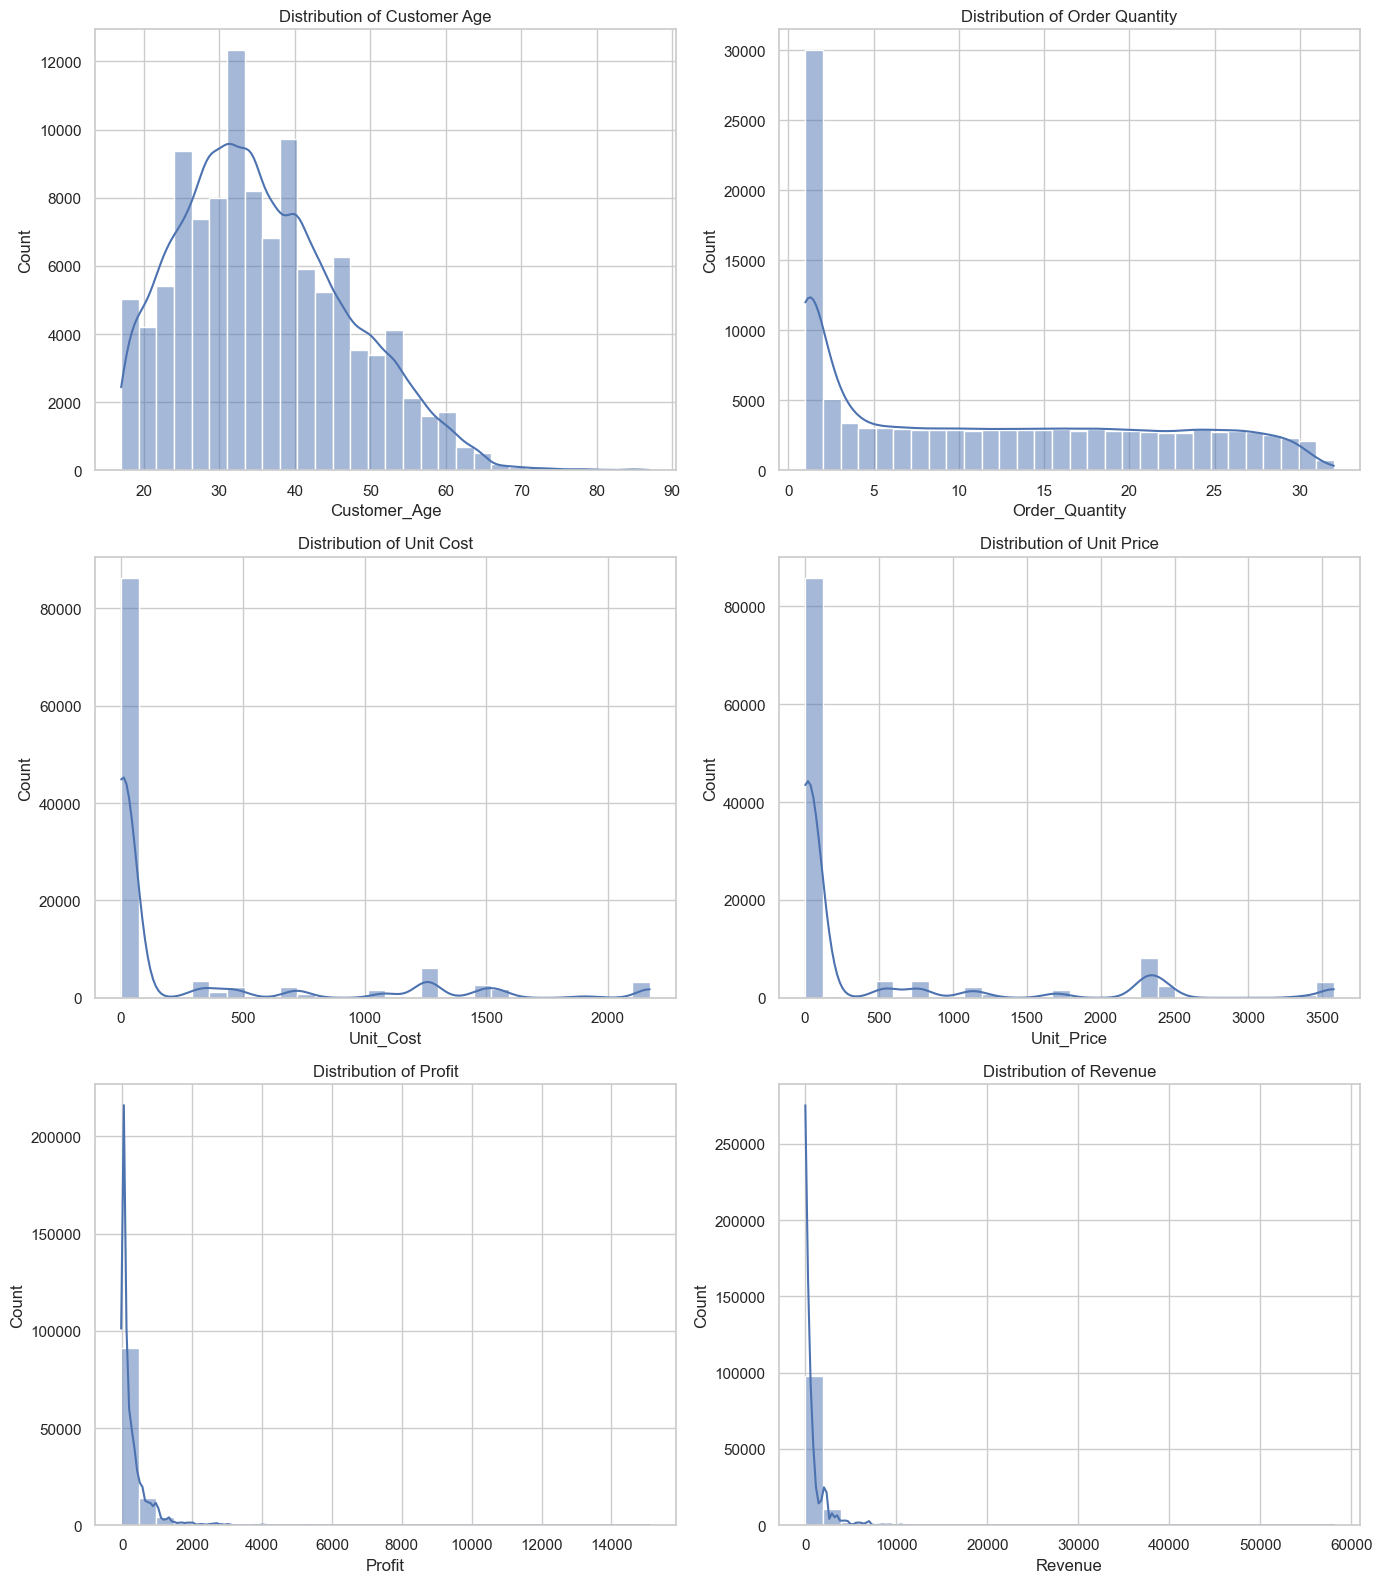

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetic style for the plots
sns.set(style="whitegrid")

# Creating a figure to plot multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))

# Histograms for key numerical columns
sns.histplot(sales_data['Customer_Age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Customer Age')

sns.histplot(sales_data['Order_Quantity'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Order Quantity')

sns.histplot(sales_data['Unit_Cost'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Unit Cost')

sns.histplot(sales_data['Unit_Price'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Unit Price')

sns.histplot(sales_data['Profit'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Profit')

sns.histplot(sales_data['Revenue'], bins=30, kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Revenue')

plt.tight_layout()
plt.show()


Average profit by product category. Sales Revenue by Country. Distribution of Customer Age by Age Group

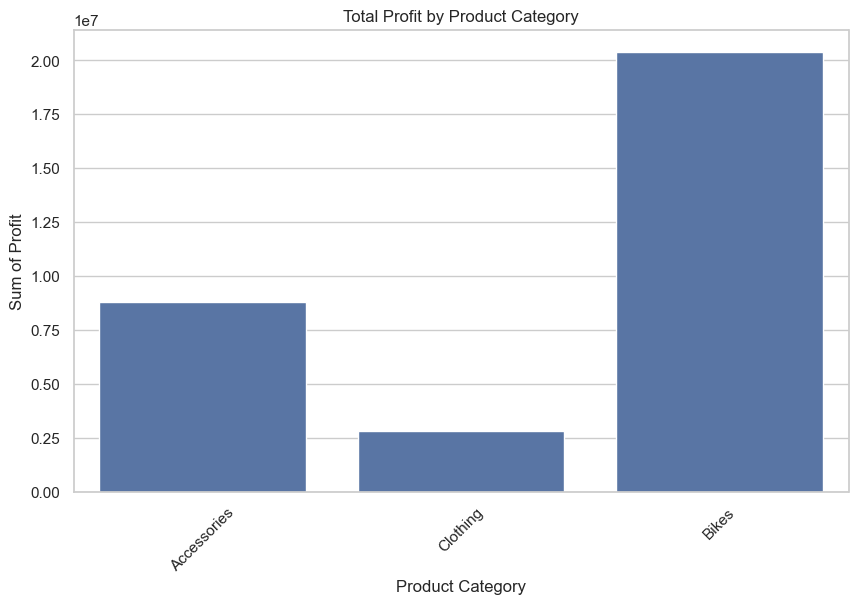

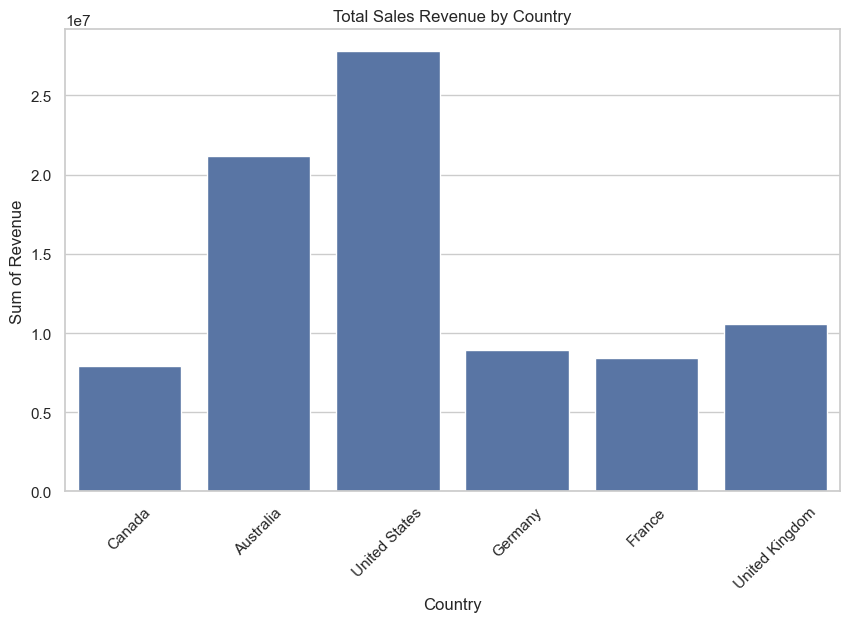

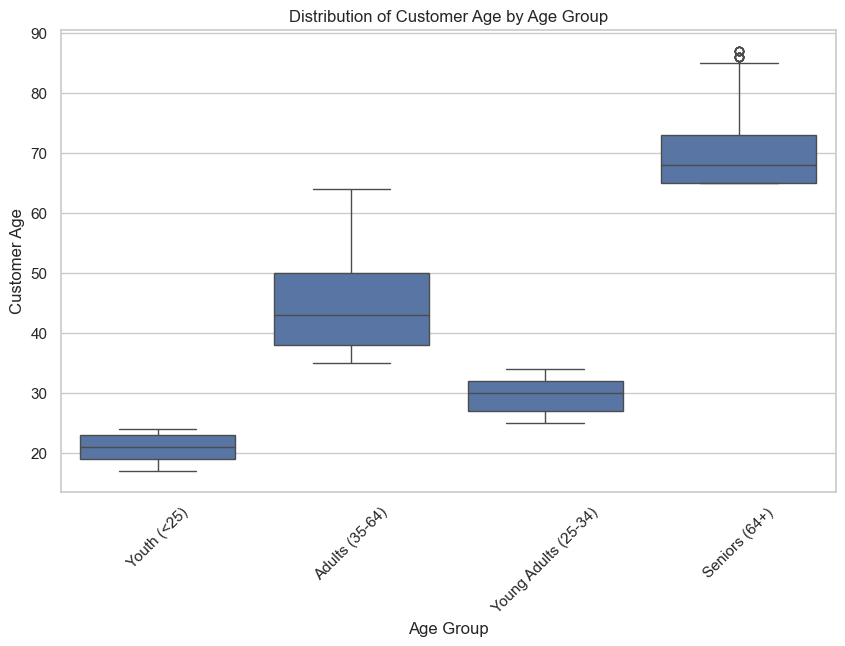

In [5]:
# Setting up a larger figure size for better visibility
plt.figure(figsize=(10, 6))

# Bar plot for average profit by product category
sns.barplot(x='Product_Category', y='Profit', data=sales_data, estimator=sum, errorbar=None)
plt.title('Total Profit by Product Category')
plt.ylabel('Sum of Profit')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()

# Next, we'll plot sales revenue by country
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Revenue', data=sales_data, estimator=sum, errorbar=None)
plt.title('Total Sales Revenue by Country')
plt.ylabel('Sum of Revenue')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

# Lastly, boxplot for the distribution of customer age by age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Customer_Age', data=sales_data)
plt.title('Distribution of Customer Age by Age Group')
plt.ylabel('Customer Age')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()


: Apply statistical methods to test hypotheses or find significant differences and correlations.

In [9]:

import pandas as pd
from scipy.stats import kruskal

# Load your data
data = pd.read_csv(r"C:\Users\moroi\OneDrive\Desktop\Sales.csv" )

# Group data by 'Product_Category' and list profits
category_groups = [group['Profit'].values for name, group in data.groupby('Product_Category')]

# Kruskal-Wallis test
stat, p_value = kruskal(*category_groups)
print('Kruskal-Wallis Test Statistic:', stat)
print('P-value:', p_value)




Kruskal-Wallis Test Statistic: 42069.8020717006
P-value: 0.0


Setting up Dunn's Test

In [10]:
import pandas as pd
import scikit_posthocs as sp
from scipy.stats import kruskal



# Group data by 'Product_Category' and list profits
category_groups = data.groupby('Product_Category')['Profit']

# Performing Kruskal-Wallis test first
stat, p_value = kruskal(*[group.values for name, group in category_groups])

# If Kruskal-Wallis test is significant, proceed with Dunn's test
if p_value < 0.05:
    # Convert groups to a form suitable for post-hoc analysis
    data['group_codes'] = data['Product_Category'].astype('category').cat.codes
    # Dunn's test for multiple comparisons
    result = sp.posthoc_dunn(data, val_col='Profit', group_col='group_codes', p_adjust='bonferroni')
    print(result)


              0    1             2
0  1.000000e+00  0.0  2.063910e-17
1  0.000000e+00  1.0  0.000000e+00
2  2.063910e-17  0.0  1.000000e+00


What products each country should focus on based on profitability and popularity:

In [11]:
import pandas as pd



# Group data by 'Country' and 'Product', then calculate total profit, total revenue, and total quantity sold
product_performance = data.groupby(['Country', 'Product']).agg(
    Total_Profit=('Profit', 'sum'),
    Total_Revenue=('Revenue', 'sum'),
    Total_Quantity=('Order_Quantity', 'sum')
).reset_index()

# Determine top products by profit and quantity sold for each country
top_products_by_profit = product_performance.sort_values(['Country', 'Total_Profit'], ascending=False).groupby('Country').head(3)
top_products_by_demand = product_performance.sort_values(['Country', 'Total_Quantity'], ascending=False).groupby('Country').head(3)

print("Top Products by Profit in Each Country:")
print(top_products_by_profit)

print("\nTop Products by Demand in Each Country:")
print(top_products_by_demand)


Top Products by Profit in Each Country:
            Country                  Product  Total_Profit  Total_Revenue  \
652   United States  Mountain-200 Silver, 42        514692        1243908   
674   United States         Road-150 Red, 52        487265        1366520   
650   United States   Mountain-200 Black, 46        463854        1158714   
527  United Kingdom   Mountain-200 Black, 38        264398         612454   
588  United Kingdom    Sport-100 Helmet, Red        244543         398866   
531  United Kingdom  Mountain-200 Silver, 42        220080         509994   
407         Germany  Mountain-200 Silver, 46        155581         413845   
406         Germany  Mountain-200 Silver, 42        146987         359675   
405         Germany  Mountain-200 Silver, 38        140396         363212   
341          France    Sport-100 Helmet, Red        128758         228845   
277          France  Mountain-200 Silver, 46        117575         327731   
340          France   Sport-100 Helm

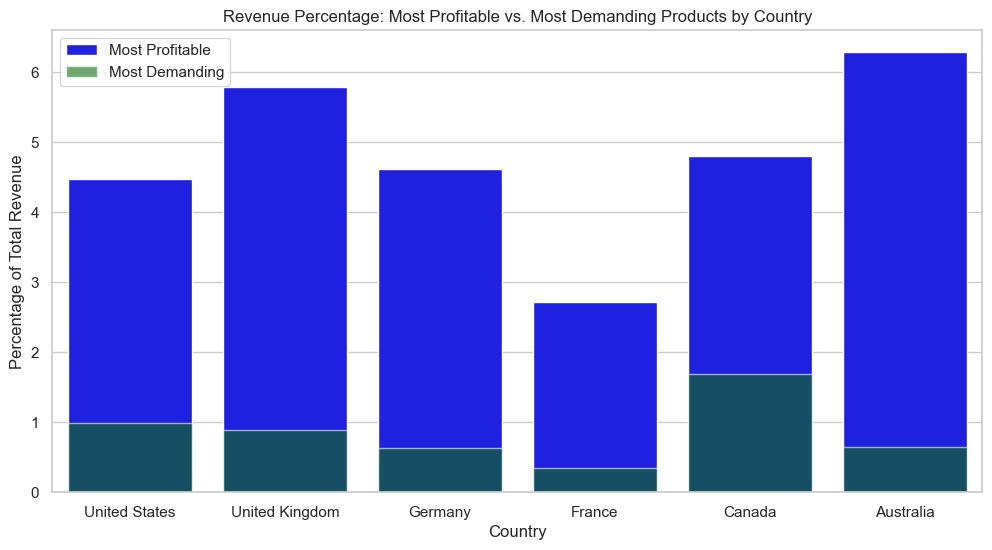

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate total revenue by country for normalization later
total_revenue_by_country = data.groupby('Country')['Revenue'].sum().reset_index()
total_revenue_by_country.rename(columns={'Revenue': 'Revenue_total'}, inplace=True)

# Compute metrics for top demanding and top profitable products
product_performance = data.groupby(['Country', 'Product']).agg(
    Total_Revenue=('Revenue', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Total_Quantity=('Order_Quantity', 'sum')
).reset_index()

# Determine top products by profit and demand
top_profit = product_performance.sort_values(['Country', 'Total_Profit'], ascending=False).groupby('Country').head(1)
top_demand = product_performance.sort_values(['Country', 'Total_Quantity'], ascending=False).groupby('Country').head(1)

# Merge to get total revenue for normalization
top_profit = pd.merge(top_profit, total_revenue_by_country, on='Country')
top_demand = pd.merge(top_demand, total_revenue_by_country, on='Country')

# Calculate revenue percentages
top_profit['Revenue_Percent'] = top_profit['Total_Revenue'] / top_profit['Revenue_total'] * 100
top_demand['Revenue_Percent'] = top_demand['Total_Revenue'] / top_demand['Revenue_total'] * 100

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=top_profit, x='Country', y='Revenue_Percent', color='blue', label='Most Profitable')
sns.barplot(data=top_demand, x='Country', y='Revenue_Percent', color='green', alpha=0.6, label='Most Demanding')
plt.title('Revenue Percentage: Most Profitable vs. Most Demanding Products by Country')
plt.ylabel('Percentage of Total Revenue')
plt.xlabel('Country')
plt.legend()
plt.show()
